In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df2 = pd.read_csv("data/fy24-capital-budget-plan-recommended.csv")
df2.head()

,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,Authorization_Future,Grant_Existing,...,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
0,Boston Centers for Youth and Families,BCYF Security and Technology Upgrades,Improvements to technology infrastructure and ...,Boston Centers for Youth and Families,To Be Scheduled,Citywide,750000,1250000,0,0,...,0,0,100000,1900000,0,0,0,0,0,2000000
1,Boston Centers for Youth and Families,BCYF Tobin Community Center Retaining Wall,Repair or replace the retaining wall adjacent ...,Public Facilities Department,In Design,Mission Hill,1800000,0,0,0,...,0,100000,1500000,200000,0,0,0,0,0,1800000
2,Boston Centers for Youth and Families,BCYF North End Community Center,Develop a design for a new North End Community...,Public Facilities Department,In Design,North End,5000000,63000000,0,0,...,0,400000,3000000,64600000,0,0,0,0,20000000,88000000
3,Boston Centers for Youth and Families,Pool Repairs,Renovate and upgrade locker rooms and pools in...,Boston Centers for Youth and Families,Annual Program,Citywide,1300000,1000000,0,0,...,383450,450000,700000,766550,0,0,0,0,0,2300000
4,Boston Centers for Youth and Families,Youth Budget Round 4,Engage youth across the City to create a capit...,Youth Engagement and Employment,Implementation Underway,Citywide,1000000,0,0,0,...,17140,25000,250000,707860,0,0,0,0,0,1000000


In [3]:
df2["Total_Project_Budget"] = df2["Total_Project_Budget"].astype(str)
df2["Total_Project_Budget"] = df2["Total_Project_Budget"].str.replace(",", "")
df2["Total_Project_Budget"] = pd.to_numeric(df2["Total_Project_Budget"])

In [4]:
filtered = df2[["Department", "Total_Project_Budget"]].copy()

grouped = filtered.groupby("Department").sum()
df_sorted = grouped.sort_values(by="Total_Project_Budget", ascending=False)
df_sorted

,Total_Project_Budget
Department,
Boston Public Schools,1.047254e+09
Public Works Department,9.433213e+08
Property Management Department,3.426200e+08
Parks and Recreation Department,3.318893e+08
Transportation Department,2.949688e+08
Mayor's Office of Housing,2.080000e+08
Boston Centers for Youth and Families,2.034750e+08
Environment Department,1.720322e+08
Boston Public Library,1.542900e+08


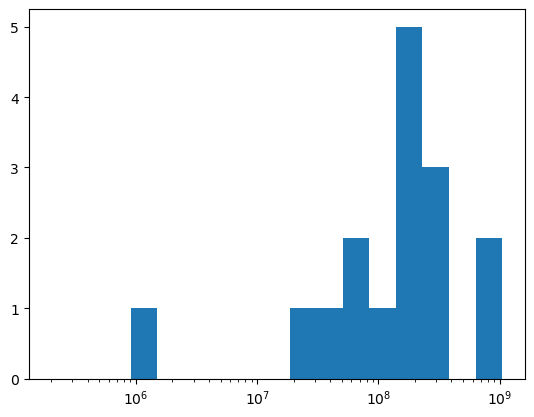

In [12]:
hist, bin_values = np.histogram(df_sorted["Total_Project_Budget"], bins=16)
logbins = np.logspace(np.log10(bin_values[0]), np.log10(bin_values[-1]), len(bin_values))

plt.hist(df_sorted["Total_Project_Budget"], bins=logbins)

plt.xscale("log")
plt.xlabel("Funding (USD)")
plt.ylabel("Number in Range")
plt.title("Distribution of Funding ")
plt.show()

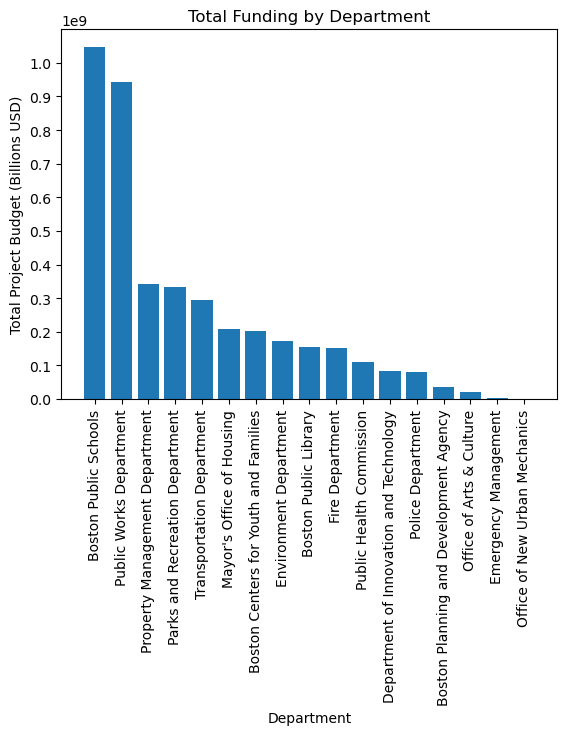

In [23]:
x = df_sorted.index
y = df_sorted["Total_Project_Budget"]

fig, ax = plt.subplots()
ax.bar(x, y, label=x)

plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1100000000, step=100000000))
plt.xlabel("Department")
plt.ylabel("Total Project Budget (Billions USD)")
plt.title("Total Funding by Department")

plt.show()